# **Methylation Biomarkers for Predicting Cancer**

## **Dimensionality Reduction: Principal Component Anlaysis**

**Author:** Meg Hutch

**Date:** January 24, 2020

**Objective:** Reduce dimensionality of the gene methylation data

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

Load Training and testing sets processed in R

In [2]:
# Training set
mcTrain = pd.read_csv('C:\\Users\\User\\Box Sync/Projects/Multi_Cancer_DL/02_Processed_Data/mcTrain.csv')
# Testing set
mcTest = pd.read_csv('C:\\Users\\User\\Box Sync/Projects/Multi_Cancer_DL/02_Processed_Data/mcTest.csv')

**Data Pre-Processing**

Check if any missing values: Nope!

In [3]:
mcTest.columns[mcTest.isna().any()].tolist()
mcTrain.columns[mcTest.isna().any()].tolist()

[]

## **Principal Component Analysis**

We will first conduct dimensionality reduction using principal component analysis

First, subset the training set to only include the methylated gene information

In [4]:
# remove non-gene data from both the training and testing sets
genesTrain = mcTrain.drop(columns=["diagnosis", "dilute_library_concentration", "age", "gender"])

genesTest = mcTest.drop(columns=["diagnosis", "dilute_library_concentration", "age", "gender"])

In [5]:
genesTest

,seq_num,OR4F5,AL627309.1,OR4F29,OR4F16,AL669831.1,AL645608.2,SAMD11,AL645608.1,NOC2L,...,KLHDC7B,SYCE3,CPT1B,CHKB-CPT1B,CHKB,MAPK8IP2,ARSA,SHANK3,ACR,RABL2B
0,SEQF2357,1,27,0,0,3,9,168,0,211,...,40,88,1,27,112,120,152,1230,125,65
1,SEQF2564,0,42,0,0,11,14,183,0,222,...,58,89,0,16,121,115,125,1090,102,67
2,SEQF2341,3,28,0,0,7,22,156,0,240,...,48,119,0,27,142,132,167,1255,137,102
3,SEQF2522,0,47,0,0,12,18,258,0,387,...,51,131,0,31,163,200,221,1575,150,113
4,SEQF2598,0,35,0,0,5,11,202,0,269,...,67,115,0,26,143,197,178,1546,152,87
5,SEQF2438,1,1,0,0,0,1,6,0,13,...,5,7,0,1,10,8,8,59,5,3
6,SEQF2141,3,27,0,0,10,13,126,0,193,...,58,111,0,24,119,118,85,943,98,77
7,SEQF2580,0,21,0,0,6,8,149,0,183,...,39,80,0,20,81,105,133,798,79,82
8,SEQF2445,1,22,0,0,9,9,150,0,239,...,56,121,0,32,148,138,116,1107,95,89
9,SEQF2149,2,22,0,0,6,8,152,0,235,...,42,124,1,26,139,154,123,1081,115,91


Create patient seq_num id index

In [6]:
## Training set
# Convert patinet_ids to row names first
genesTrain = genesTrain.set_index(genesTrain.seq_num)

# Remove seq_num as a column
genesTrain = genesTrain.drop(columns=["seq_num"])

# Create a list of row names
patients = list(genesTrain.index)

## Testing set
# Convert patinet_ids to row names first
genesTest = genesTest.set_index(genesTest.seq_num)

# Remove seq_num as a column
genesTest = genesTest.drop(columns=["seq_num"])

# Create a list of row names
patientsTest = list(genesTest.index)

# 1) Standardize Dataset

Must scale features in your data before applying PCA. **StandardScaler** helps standardize features onto unit scale (mean = 0 and standard deviation = 1). Thus, each value in the dataset will have the sample mean value subtracted and then divided by the standard deviation of the whole dataset. 


In [7]:
# pca packages
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

# convert integer type to float
cols = genesTrain.columns

#genesTrain[cols] = genesTrain[cols].astype(np.float)
#genesTest[cols] = genesTest[cols].astype(np.float)

# Stanardize/Scale the data
x = StandardScaler().fit_transform(genesTrain)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


**Let's check whether the normalized data has a mean of zero and a standard deviation of 1**

In [8]:
np.mean(x), np.std(x)

(-7.303468988602816e-19, 0.9613744523838432)

**Standardize the Test Set**

To standardize each column of the test set, we need to subtract the mean of the training data and then divide by the standard deviation of the training data.

In [9]:
# Functions to calculate mean and sd of each column 
genesTrain_mean = genesTrain.mean()
genesTrain_sd = genesTrain.std()

In [10]:
# Transpose the mean dataset
genesTrain_mean = pd.DataFrame(genesTrain_mean)
genesTrain_mean = genesTrain_mean.transpose()

# add duplicated rows to match the number of rows in the test set (57 samples) - this will faciliate the subtraction and standard deviation division
genesTrain_mean = pd.concat([genesTrain_mean]*57)

# Transpose the sd dataset
genesTrain_sd = pd.DataFrame(genesTrain_sd)
genesTrain_sd = genesTrain_sd.transpose()
# add duplicated rows to match the number of rows in the test set

# Add duplicated rows to the sd dataset
genesTrain_sd = pd.concat([genesTrain_sd]*57)

In [11]:
# remove index
genesTest.reset_index(level=0, inplace=True)
# Drop seq_num column
genesTest = genesTest.drop(columns=["seq_num"])

**Replace 0s with 0.01 in order to not get NA values - is this koshure?**

In [12]:
genesTrain_sd = genesTrain_sd.replace(0, 0.0000000001)

**Subtract each value in the Test set by the training set mean and divide by the training set standard deviation

In [13]:
# Subtract the mean values from the genesTest
genesTest = pd.DataFrame(genesTest.values-genesTrain_mean.values, columns=genesTest.columns)

# Divide the trained mean subtracted values by standard deviation of the training set
genesTest = pd.DataFrame(genesTest.values/genesTrain_sd.values, columns=genesTest.columns)

**Remove any genes that have NAs**

Because we converted 0s to NA, none of these are NAs

In [14]:
genesTest = genesTest.dropna(axis = 1) # by indicating axis = 1, we are able to drop any genes that have become NAs === are we still have to perform PCA now? 

**Convert the normalized features into tabular format**

In [15]:
# Create list of column names
features = list(genesTrain.columns.values) 

# Create data frame of newly normalized data - use patients IDs as the index 
x = pd.DataFrame(x, columns = features, index = patients)

# 2) Determine Prinicpal Components

Reference: https://stackoverflow.com/questions/42167907/understanding-scikitlearn-pca-transform-function-in-python

**pca.fit** allows PCA function to compute vectors that you can project your data onto in order to reduce the dimension of your data.

**pca.transform** actually performs the projection. It projects each row of data into the vector space that was learned when fit was called.

from sklearn: **fit_transform**: Fit the model with X and apply the dimensionality reduction on X

In [16]:
## Define pca function
pca = PCA()

# Fit to the scaled/standardized data - then use transform to prokect into the new vector space learned by fit
principalComponents = pca.fit_transform(x)

# Generate a list of column names with the number for each prinicpal component 
col_names = [f'pc{i}' for i in range(1, 239)] # there are 238 samples - so we want to have range of 1 less than 239 column names 

# Add column names to the principal component dataset 
principalDf_ALL = pd.DataFrame(principalComponents, columns = col_names, index = patients)

**3) Determine # of Components and Variance**

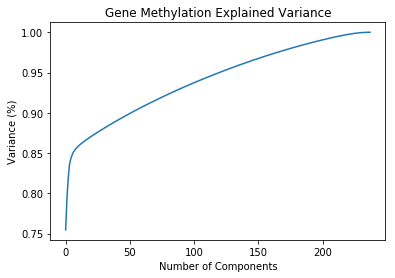

In [17]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Gene Methylation Explained Variance')
plt.savefig('C:\\Users\\User\\Box Sync/Projects/Multi_Cancer_DL/04_Results/Component_%Variance.png')
plt.show()

**Alternative method - Pre-selecting % of variance**

When we fit the PCA classifier and transform x after specifying 90%, we get 52 principal components representing 90% of the variance.

In [18]:
pca = PCA(0.9)
genesTrain_transformed = pca.fit_transform(x)

pca.n_components_ 

52

**Define PC column names and create dataframe**

In [19]:
# Define new pc column names (up to pc52)
col_names = [f'pc{i}' for i in range(1, 53)] 

# Add column names to the principal component dataset 
genesTrain_transformed = pd.DataFrame(genesTrain_transformed, columns = col_names, index = patients)

**Scree Plot**

View which principal components contribute most to the variance 

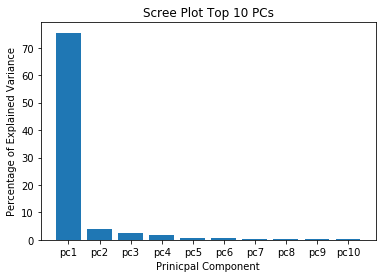

In [20]:
# remove PC from 
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
per_var = per_var[:10] #top 10 PC - this number is chosen just so that we can more easily view the plot
labels = col_names[:10]

plt.bar(x=range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Prinicpal Component')
plt.title('Scree Plot Top 10 PCs')
plt.savefig('C:\\Users\\User\\Box Sync/Projects/Multi_Cancer_DL/04_Results/PCA_Screeplot.png')
plt.show()

4) Project prinicipal components from the training set, to the test set

In [21]:
genesTest_transformed = pca.transform(genesTest)

When converted to a dataframe, we can see that the test set has been transformed into 52 principal components

In [22]:
genesTest_transformed = pd.DataFrame(data = genesTest_transformed, columns = col_names, index = patientsTest)
genesTest_transformed

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc43,pc44,pc45,pc46,pc47,pc48,pc49,pc50,pc51,pc52
SEQF2357,25.250225,-4.443535,-4.635007,6.082144,7.080589,8.925664,5.359451,-2.297909,5.027891,-4.330111,...,0.266558,-1.845526,0.131341,0.654058,0.390941,-1.878149,0.839658,-0.252221,0.354840,1.946140
SEQF2564,62.431062,10.956941,-25.784581,-8.717464,-4.448417,2.581659,4.999501,2.476348,1.702309,-3.202217,...,0.781784,0.047080,-1.739615,0.537825,-0.485420,1.064461,1.208693,-0.424580,0.723012,1.456410
SEQF2341,-56.951415,15.428931,26.476180,3.583130,-0.196875,-3.813605,0.479513,1.667263,-1.876377,-1.258884,...,-0.345646,0.254945,-0.172201,-0.494987,-0.605642,0.859293,-0.971130,0.114346,1.194947,-0.329812
SEQF2522,-106.895558,64.086903,-13.199930,-14.921555,-2.882872,3.087922,-6.422611,3.515896,-1.201376,-2.485082,...,-0.063125,0.096967,1.885420,0.094854,-0.717853,0.778982,0.624050,0.511636,1.768498,0.404321
SEQF2598,-37.366514,-14.657462,-17.649220,-6.311007,4.209848,5.043078,-1.571879,1.270158,-3.952774,-1.391306,...,-1.040574,-0.984894,0.496590,-0.717257,0.243681,0.235819,-0.606834,-0.816904,-0.338841,0.429968
SEQF2438,357.527741,2.954544,1.802790,-9.822262,0.113702,-3.002759,3.040375,0.875965,2.860194,-1.344670,...,0.165256,-0.064146,0.533428,0.006738,0.031677,-0.585413,-0.338508,-0.767853,-0.156697,-0.422856
SEQF2141,53.398567,-8.859079,6.854220,-2.540497,-0.927211,2.619255,10.033370,-0.224147,1.329375,2.204685,...,-0.932691,-0.471904,0.434272,-0.474352,0.025237,0.424958,1.903905,0.525201,-1.444138,-0.071575
SEQF2580,95.711667,8.694941,-2.333023,20.972535,4.849611,-8.560012,-6.198572,0.448527,2.312015,-1.081699,...,1.510035,-0.638572,-0.294705,-0.421616,-0.058960,-1.390000,0.971737,0.244662,0.225549,0.066609
SEQF2445,-21.185805,-4.110821,29.024923,-0.549974,3.107646,-6.707943,-5.066667,2.586326,2.148429,-3.129725,...,-0.644353,0.533419,0.379033,-0.315408,0.551035,-0.643733,-0.645399,-1.028521,-1.105694,0.408358
SEQF2149,-9.854779,-26.728769,10.160856,-0.886058,-8.940841,3.766586,2.662842,1.444827,3.349809,-3.467760,...,-0.023440,-1.339306,-0.096388,-0.611570,-0.037396,0.093618,0.432142,1.227352,0.414626,-0.661888


# **3) Save PCA Components**

In [23]:
principalDf_ALL.to_csv('C:\\Users\\User\\Box Sync/Projects/Multi_Cancer_DL/02_Processed_Data/principalDF_ALL.csv')
genesTrain_transformed.to_csv('C:\\Users\\User\\Box Sync/Projects/Multi_Cancer_DL/02_Processed_Data/genesTrain_transformed_90.csv')
genesTest_transformed.to_csv('C:\\Users\\User\\Box Sync/Projects/Multi_Cancer_DL/02_Processed_Data/genesTest_transformed_90.csv')